In [1]:
%run C:/Users/HSS/dd.py

### 보스턴 Data


In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
dfx = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ['MEDV'])
dfx.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [8]:
dfy.tail()

,MEDV
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


#### - 독립변수와 종속변수 병합


In [9]:
df = pd.concat([dfx,dfy], axis = 1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### - 변수간 관계
- TAX, MEDV 관계는 좀 이해가 안되는데?


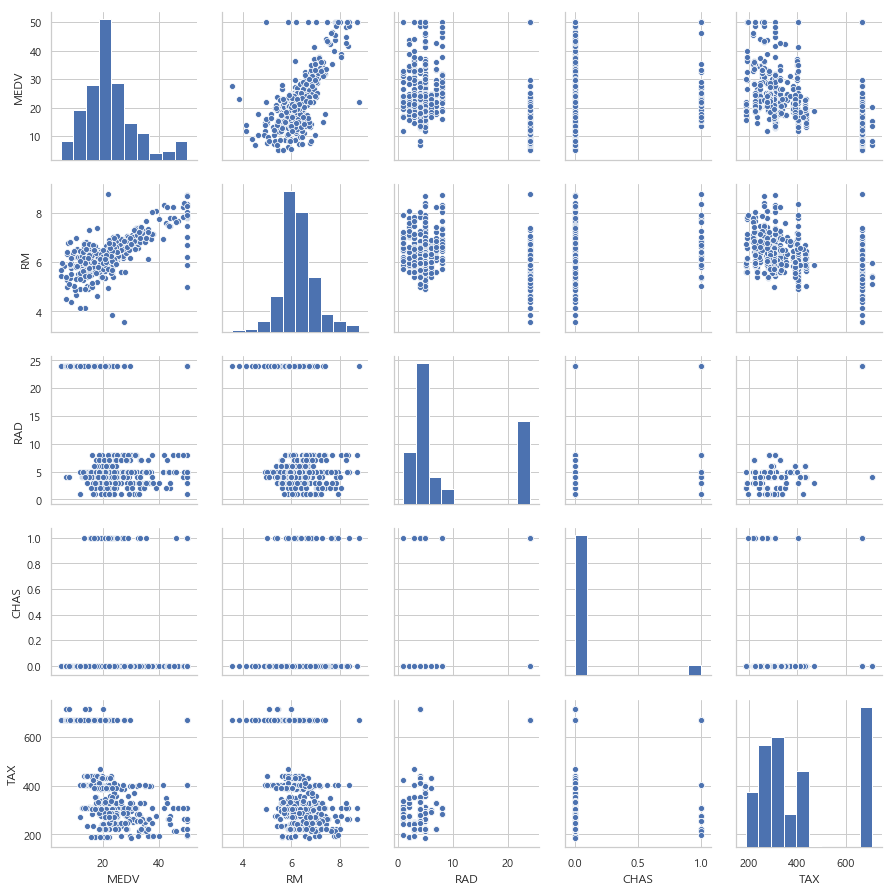

In [10]:
# sns.heatmap(df.corr(), cbar = True)
sns.pairplot(df[["MEDV", "RM", "RAD", "CHAS","TAX"]])
plt.show()

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


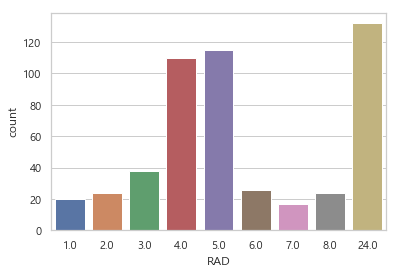

In [12]:
sns.countplot(df.RAD)

### 파이썬 회귀분석 3가지 방법
- numpy
- scikit-learn
- stats.model

In [13]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(n_samples = 200, n_features = 1, bias = bias, noise = 10, coef = True, random_state = 1)
X = sm.add_constant(X0)

In [14]:
w*X0+bias

array([[ 120.0986764 ],
       [  96.65485282],
       [ 147.59283407],
       [ 143.49929207],
       [ 289.05989188],
       [  93.67955715],
       [  76.84162656],
       [ -40.68869691],
       [ 145.84813916],
       [ 114.64276292],
       [  44.075383  ],
       [ 144.34172788],
       [ 175.11342098],
       [ 175.74300096],
       [  91.20427861],
       [ 270.05189991],
       [ 206.86383765],
       [ 168.53652276],
       [  98.90517147],
       [   5.34712316],
       [ 190.28987068],
       [ 124.68843682],
       [ 151.31364235],
       [ 250.83538795],
       [ -18.70316784],
       [  24.11094552],
       [ 177.87714376],
       [  90.45208176],
       [  93.46698086],
       [ 200.30888257],
       [  -6.33599561],
       [ 164.01958188],
       [  74.35598257],
       [ -60.61871032],
       [ 118.45956653],
       [ -74.81513545],
       [ 132.63961268],
       [ 170.10510399],
       [ 205.85617227],
       [  80.7801894 ],
       [ 289.38148531],
       [  41.972

In [15]:
y.reshape(len(y),-1)

array([[ 127.87901739],
       [  93.03291422],
       [ 161.8575084 ],
       [ 141.69205026],
       [ 283.26011945],
       [  90.25696513],
       [  56.03995466],
       [ -42.34640353],
       [ 141.31386351],
       [ 124.09193693],
       [  39.41917167],
       [ 135.07481793],
       [ 178.08066288],
       [ 180.36872137],
       [  89.19700235],
       [ 277.68618624],
       [ 202.52143015],
       [ 165.39865332],
       [ 106.38565624],
       [  -1.06621849],
       [ 185.12242638],
       [ 112.67820029],
       [ 151.75241542],
       [ 260.90931323],
       [ -17.9616411 ],
       [  31.01126238],
       [ 179.2938956 ],
       [  83.19417584],
       [ 100.66930574],
       [ 206.12479851],
       [ -12.22124607],
       [ 164.77212573],
       [  54.65764624],
       [ -51.08607086],
       [ 121.03299419],
       [ -65.9912507 ],
       [ 123.47026771],
       [ 205.83869473],
       [ 205.19728016],
       [  95.38016322],
       [ 291.19019753],
       [  45.730

In [16]:
## numpy로 정답 추정하기 : 의사역행렬 사용
## y = xw

### 2. sklearn.linear_model (LinearRegression)

- `LinearRegression()`
- `model.fit(X,y)`
- `coef_`: 가중치벡터, `intercept_`: 상수항

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X0,y)

In [18]:
model.coef_, model.intercept_

(array([86.96171201]), 99.79150868986945)

### 3. statsmodels
- 독립변수와 종속변수가 모두 담긴 (concat) DF를 만든다.
- OLS클래스의 객체를 생성한다.
- `model = OSL.from_formula(formula, data = df)`
- `model = statsmodels.api.OLS(dfy,dfx)`도 쓸 수 있다. dfx는 항상 상수항을 가지고 있어야 한다.

- `result = model.fit()`, `result.summary()`로 리포트 생성 `result.predict(x_)`로 예측

In [19]:
sm.OLS(dfx,dfy)

In [20]:
df = pd.DataFrame({
    'x': X0[:,0],
    'y': y[:]
})

In [21]:
df.head(3)

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508


In [22]:
model = sm.OLS.from_formula('y~x', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Mon, 23 Mar 2020   Prob (F-statistic):          8.17e-182
Time:                        17:45:01   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.000      98.402     101.181
x             86.9617      0.769    113.058      0.000      85.445      88.479
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.059
Skew:                           0.121   Prob(JB):                        0.589
Kurtosis:                       3.262   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Mon, 23 Mar 2020   Prob (F-statistic):          8.17e-182
Time:                        17:45:01   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [24]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

In [25]:
dfx = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ['MEDV'])
df = pd.concat([dfx,dfy], axis = 1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [26]:
dfx = sm.add_constant(dfx)
model = sm.OLS(dfy,dfx)
result = model.fit()


#### Result 해석하기

- OLS, Least Square, 종속변수: `MEDV`
- `Df Model`: 독립변수 개수
- `Df Residuals`: `No.Observations` - `Df Model`
- warning.2 에 집중. 조건수가 크기 때문에 다중공선성 혹은 다른 수치적 무네가 있을 수 있다.

In [27]:
print(result.summary(), result.params)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 23 Mar 2020   Prob (F-statistic):          6.95e-135
Time:                        17:45:02   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

In [28]:
# sm.OLS.from_formula('MEDV ~ ' + '+'.join(boston.feature_names), data = boston)

### 조건수?

- 공분산 행렬의 가장 큰 고유값과 가장 작은 고유값의 비율
- 조건수가 커지면 입력의 오차에 계수가 아주 민감하게 반응한다.(오차가 커진다, 예측 불가)
    - 그렇다면 조건수는 왜 커질까?
        - 1. 스케일링이 안되었을 때: 스케일링을 한다 ^^
        - 2. 다중공선성이 존재할 때: 변수를 선택하거나, PCA를 통해 하나의 축에서 만들어진 DATA를 사용한다.

In [29]:
# 보스턴 문제의 경우, TAX와 B의 분산이 다른 칼럼을 크게 웃도는 것을 발견할 수 있다. 
dfx.describe().T['std']

const        0.000000
CRIM         8.596783
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

In [30]:
feature_names = list(boston.feature_names)
feature_names.remove('CHAS')
feature_names = ['scale({})'.format(name) for name in feature_names] + ['CHAS']
feature_names

['scale(CRIM)',
 'scale(ZN)',
 'scale(INDUS)',
 'scale(NOX)',
 'scale(RM)',
 'scale(AGE)',
 'scale(DIS)',
 'scale(RAD)',
 'scale(TAX)',
 'scale(PTRATIO)',
 'scale(B)',
 'scale(LSTAT)',
 'CHAS']

In [31]:
model = sm.OLS.from_formula('MEDV ~' + '+'.join(feature_names), data = df)
result = model.fit()

In [32]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 23 Mar 2020   Prob (F-statistic):          6.95e-135
Time:                        17:45:03   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3468      0.219    101.

In [33]:
np.random.choice(100,100,replace = True)

array([ 5, 42, 45, 79, 23, 87, 59, 38, 46, 60, 55, 35, 14, 76, 42, 49, 52,
       33,  3, 68, 39, 40, 63, 78, 46, 74, 31, 16, 11, 16, 66, 87, 54, 22,
       94, 68, 51,  1, 85, 51, 77, 77, 23, 22, 16, 81, 49, 97, 15,  9,  2,
       88, 86, 40, 89, 15, 61, 41, 98, 78,  3,  2, 97, 66, 48, 42, 78, 99,
       58, 27, 75, 36, 11, 17, 22, 95, 87, 50, 37, 91, 86, 32, 80, 53, 25,
       85, 77, 30, 97, 56, 92, 96, 18,  2, 78, 24, 81,  2, 45, 29])

### 범주형 변수와 더미변수
- 축소랭크 방식에서 계수는 기준(상수항)에서의 변동폭을 나타냄

In [34]:
import datetime
from calendar import isleap
import statsmodels.api as sm

In [35]:
def convert_partial_year(number):
    #"연 단위 숫자에서 날짜를 계산하는 코드"
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year))) #
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

In [61]:
df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]
df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


In [62]:
model = sm.OLS.from_formula("value ~ C(month)", df_nottem)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Mon, 23 Mar 2020   Prob (F-statistic):          2.96e-125
Time:                        17:53:20   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.

#### 해석
- 기준월: 1월
- P-value를 보면 2월과 12월은 1월과 기온이 다르다고 할 수 없다.
- 1월과 가장 큰 온도차를 보이는 달은 7월 (22.2050)이다.

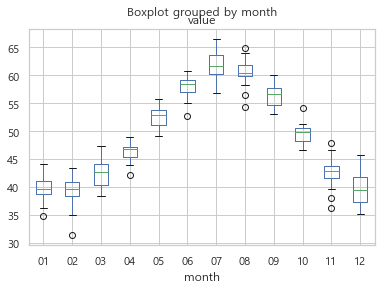

In [63]:
df_nottem.boxplot("value", "month")
plt.show()